In [6]:
import random
from utils.snowflake_funcs import snowflake_connector  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

## Load data

In [ ]:
# load data from the database by SQL

In [14]:
# get the proportion of users have pre-experiment data
len(data.loc[data['PRE_NUM_GAME_START'].isna()])/len(data)

0.3523032450743615

In [6]:
# check missing values
data.isna().sum()

INSTALL_PK                  0
NUM_GAME_START              0
PLATFORM                    1
COUNTRY_CODE              264
DEVICE_TYPE                 0
PRE_NUM_GAME_START    1985338
COHORT_DAY                  0
INSTALL_DATE                0
dtype: int64

## Function: CUPED adjustment

In [8]:
def cuped(data):
   # Calculate theta
   covariance = data['PRE_NUM_GAME_START'].cov(data['NUM_GAME_START'])
   pre_exp_var = data['PRE_NUM_GAME_START'].var()
   theta = covariance/pre_exp_var

   # Compute CUPED Adjusted Metric
   data['CUPED_NUM_GAME_START'] = data['NUM_GAME_START'] - theta * (data['PRE_NUM_GAME_START'] - data['PRE_NUM_GAME_START'].mean())

   # ensure missing values are handled
   # If there are any missing values in the CUPED_NUM_GAME_START column, they are replaced by the corresponding values from the NUM_GAME_START column. 
   data['CUPED_NUM_GAME_START'] = data['CUPED_NUM_GAME_START'].combine_first(data['NUM_GAME_START'])
   
   
   return data


## Functions: calculate metric

In [10]:
def calculate_cuped_avg_new_game_start(data):
    total_game_start = data['CUPED_NUM_GAME_START'].sum()
    total_users = data['INSTALL_PK'].nunique()

    return total_game_start/total_users

## A/A test

In [ ]:
# get CUPED adjusted number of game start
cuped_data = cuped(data)

In [11]:
# main
game_start_difference_cuped = []

for i in range(0, 1000):
    print(i)
   
    # split data to treatment and control groups randomly
    treatment, control = train_test_split(cuped_data, test_size=0.5, shuffle=True)

    # calculate the mean of target metric
    t_game_start = calculate_cuped_avg_new_game_start(treatment)
    c_game_start = calculate_cuped_avg_new_game_start(control)

    # store the difference
    game_start_difference_cuped.append(t_game_start - c_game_start)
    
game_start_difference_cuped

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[-0.02873390730225367,
 0.010715605163053255,
 -0.0031318462805529634,
 0.06748998245641147,
 0.023742899808464557,
 -0.03065417627313849,
 0.03611486421386445,
 -0.04318742043584578,
 -0.008561273403717706,
 0.029130864561174974,
 0.0008791539600601084,
 0.0726533904858293,
 -0.03771075201085594,
 -0.032488592389970705,
 -0.03240160478010523,
 -0.0043594469362773225,
 -0.05029165642727307,
 -0.011275553940130578,
 -0.017220293850908064,
 0.055113114634607996,
 -0.05169715327714286,
 -0.016497166292353427,
 -0.05869124344832244,
 -0.013266395237831574,
 -0.0028837629901410367,
 -0.001487486238378466,
 0.008804722074906124,
 0.001915654226309016,
 -0.026533016081327077,
 -0.017310272879697663,
 0.018879309916805198,
 0.008158154960820951,
 0.04370682075254706,
 -0.02225895630219199,
 0.008511909527150863,
 -0.010982437293190372,
 -0.06365175866121575,
 -0.018834682634700783,
 -0.020270061955077523,
 -0.01653256357881716,
 0.004124737831208591,
 0.05981529990247125,
 0.002559695673436835

## Result visualisation

<Axes: ylabel='Density'>

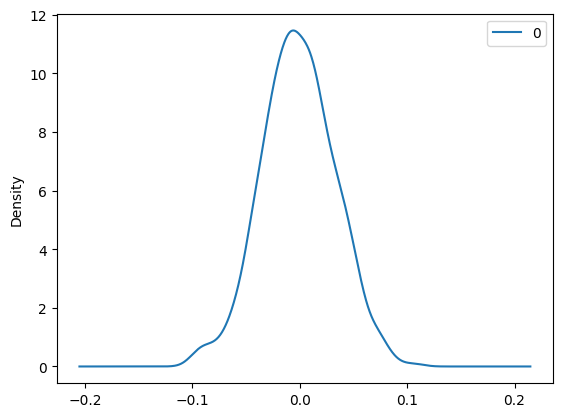

In [12]:
df_game_start_difference_cuped = pd.DataFrame(game_start_difference_cuped,dtype=float)
df_game_start_difference_cuped.plot.kde()

/var/folders/vx/w5z5d3dd317gflztcs29ll8h0000gn/T/ipykernel_1358/830600019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_game_start_difference_cuped)


Text(0, 0.5, 'Density')

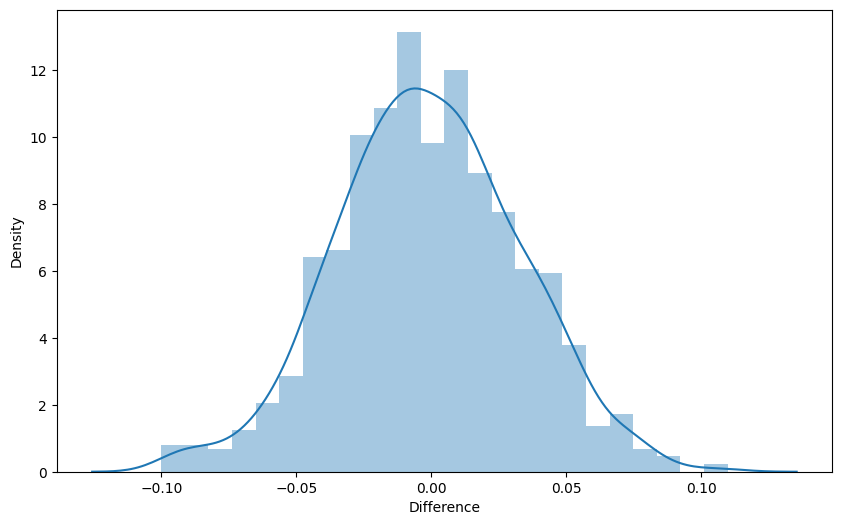

In [6]:
plt.figure(figsize=(10, 6))
sns.distplot(df_game_start_difference_cuped)
plt.xlabel('Difference')
plt.ylabel('Density')

In [15]:
df_game_start_difference_cuped.to_pickle('result/model3.pkl')